### Team members

##### Chirag Bhuvaneshwara
* 2571703
* s8chbhuv@stud.uni-saarland.de

##### Priyasha Chatterjee 
* 2572739
* s8prchat@stud.uni-saarland.de

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
from numpy.linalg import inv

# 1.1 Ground truth

In [11]:
def groundTruth(x0, v0, alpha, delta_t, sigma, N):
    xVals = [x0]
    vVals = [v0]
    for k in range(N):
        v_k_1 = vVals[k] + alpha * delta_t
        vVals.append(v_k_1)
        
        c = random.gauss(0, sigma)
        x_k_1 = xVals[k] + c + vVals[k] * delta_t 
        xVals.append(x_k_1)
    
    xVals = np.array(xVals)
    vVals = np.array(vVals)
    
    return xVals, vVals

# 1.2 Sensor Outputs

In [12]:
def measurementsOnBoat(x, v, epsilon, neta):
    N = len(x)
    x = np.array(x)
    v = np.array(v)
    epsilonVec = np.random.normal(0, epsilon, N)
    netaVec = np.random.normal(0, neta, N)
    
    z = x + epsilonVec
    V = v + netaVec
    
    return z, V

In [13]:
x0 = 1
v0 = 0
alpha = 0.15
delta_t = .2
N = 100
sigma_c = 0.01
sigma_eps = 4
sigma_neta = 4

xVals,vVals = groundTruth(x0,v0,alpha,delta_t, sigma_c,N)

In [14]:
x_observations, v_observations = measurementsOnBoat(xVals, vVals, sigma_eps, sigma_neta)

# 1.3 Kalman Filter

In [15]:
def prediction2d(x, v, t, a):
    A = np.array([[1, t],
                  [0, 1]])
    X = np.array([[x],
                  [v]])
    B = np.array([[0.5 * t ** 2],
                  [t]])
    X_prime = A.dot(X) + B.dot(a)
    return X_prime

def covariance2d(sigma1, sigma2):
    cov1_2 = sigma1 * sigma2
    cov2_1 = sigma2 * sigma1
    cov_matrix = np.array([[sigma1 ** 2, cov1_2],
                           [cov2_1, sigma2 ** 2]])
    return np.diag(np.diag(cov_matrix))

In [16]:
def kalman_filter(sigma_c = 0.01, sigma_eps = 4, sigma_neta = 4):

    x0 = 1
    v0 = 0
    alpha = 0.15
    delta_t = .2
    N = 100

    xVals,vVals = groundTruth(x0,v0,alpha,delta_t, sigma_c,N)
    x_observations, v_observations = measurementsOnBoat(xVals, vVals, sigma_eps, sigma_neta)
    z = np.c_[x_observations, v_observations]

    # Initial Conditions
    a = .15  # Acceleration
    v = 0
    t = .2  # Difference in time

    # Process / Estimation Errors
    error_est_x = .01 / 2
    error_est_v = .01 / 2

    # Observation Errors
    error_obs_x = 4  # Uncertainty in the measurement
    error_obs_v = 4

    # Initial Estimation Covariance Matrix
    P = covariance2d(error_est_x, error_est_v)
    A = np.array([[1, t],
                  [0, 1]])

    # Initial State Matrix
    X = np.array([[z[0][0]],
                  [v]])
    n = len(z[0])
    optVals = [[z[0]]]
    for data in z[1:]:
        X = prediction2d(X[0][0], X[1][0], t, a)
        optVals.append(X)
        # To simplify the problem,
        # set off-diagonal terms to 0.
        P = np.diag(np.diag(A.dot(P).dot(A.T)))

        # Calculating the Kalman Gain
        H = np.identity(n)
        R = covariance2d(error_obs_x, error_obs_v)
        S = H.dot(P).dot(H.T) + R
        K = P.dot(H).dot(inv(S))

        # Reshape the new data into the measurement space.
        Y = H.dot(data).reshape(n, -1)

        # Update the State Matrix
        # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
        X = X + K.dot(Y - H.dot(X))

        # Update Process Covariance Matrix
        P = (np.identity(len(K)) - K.dot(H)).dot(P)
    
    x_opt = [optVals[i][0][0] for i in range(len(optVals))]
    
    return xVals, x_observations, x_opt

In [27]:
xVals, x_observations, x_opt = kalman_filter()

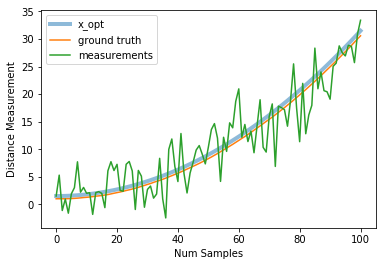

In [29]:
def visualizeKalmanOps(xVals, x_observations, x_opt):

    plt.plot(x_opt, label = 'x_opt', linewidth=4, alpha = 0.5)
    plt.plot(xVals, label = 'ground truth', )
    plt.plot(x_observations, label = 'measurements')
    plt.legend()
    plt.xlabel('Num Samples')
    plt.ylabel('Distance Measurement')
    plt.show()
    
visualizeKalmanOps(xVals, x_observations, x_opt)

# 1.4 Vary Parameters

In [45]:
sigma_c = [0.01, 0.1, 0.5,1, 5, 10]
sigma_eps_neta = [.01, .1, 1, 10, 100]

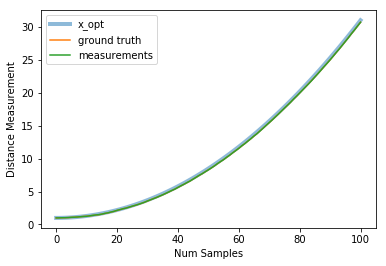

In [46]:
i = 0
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

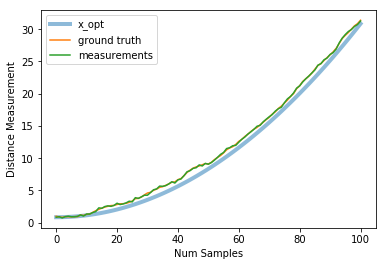

In [47]:
i = 1
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

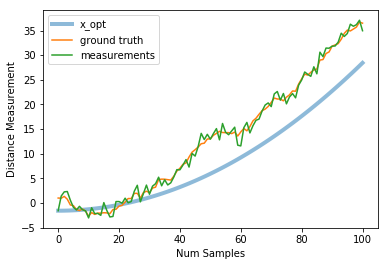

In [48]:
i = 2
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

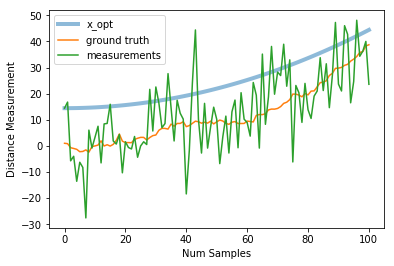

In [49]:
i = 3
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

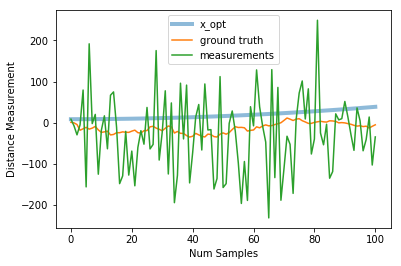

In [50]:
i = 4
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

In [56]:
sigma_c = [0.01, 0.1, 0.5,1, 5, 10]
sima_c = sigma_c[::-1]
sigma_eps_neta = [.01, .1, 1, 10, 100]
# sigma_eps_neta = [i for i in sigma_eps_neta[]]

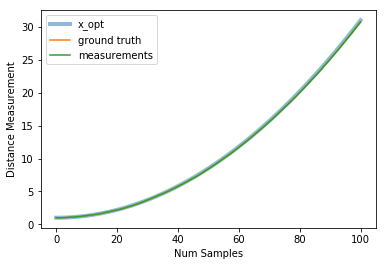

In [58]:
i = 0
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

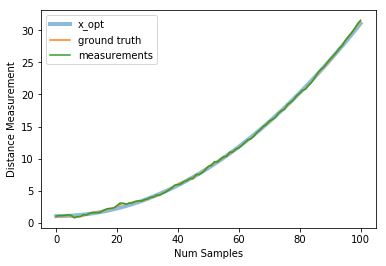

In [59]:
i = 1
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

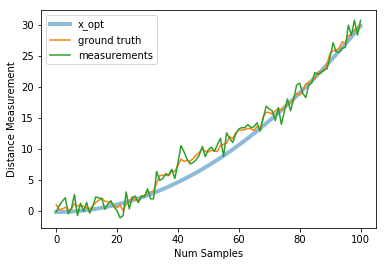

In [60]:
i = 2
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

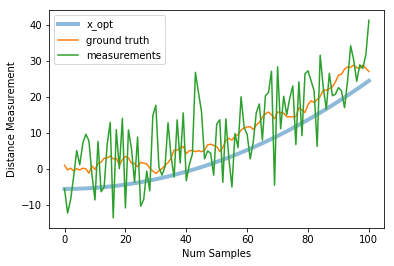

In [61]:
i = 3
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

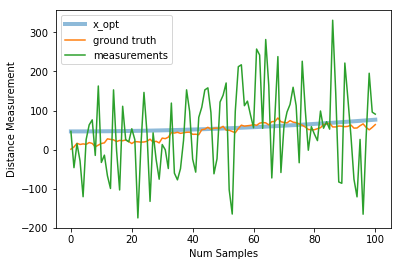

In [62]:
i = 4
xVals, x_observations, x_opt = kalman_filter(sigma_c = sigma_c[i], sigma_eps = sigma_eps_neta[i], sigma_neta = sigma_eps_neta[i])
visualizeKalmanOps(xVals, x_observations, x_opt)

### Observations:

When the sensor observations are off by a large margin due to corresponding variances being high, the optimal estimates from the Kalman filter are not too accurate.